# Modulos


In [104]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn import preprocessing
import matplotlib.pyplot as plt
import os
# import the relevant modules

from sklearn.cluster import KMeans
from Bio import SeqIO
import copy
import math
import glob
import re	
import plotly.express as px


In [130]:
final_df = pd.read_csv("snv_data.csv")
final_df = final_df.fillna(0)

* Soma < 200

In [131]:
for column in final_df.columns[14:]:
	if sum(final_df[column]) < 200:
		final_df.drop([column], axis=1, inplace=True)
	else:
		continue

In [146]:
final_df.to_csv("snv_data_r.csv")

* Soma < 30

In [91]:
# for column in final_df.columns[14:]:
# 	if sum(final_df[column]) < 30:
# 		final_df.drop([column], axis=1, inplace=True)
# 	else:
# 		continue

* Soma < 20

In [ ]:
# for column in final_df.columns[14:]:
# 	if sum(final_df[column]) < 20:
# 		final_df.drop([column], axis=1, inplace=True)
# 	else:
# 		continue

* Soma < 10

In [ ]:
# for column in final_df.columns[14:]:
# 	if sum(final_df[column]) < 10:
# 		final_df.drop([column], axis=1, inplace=True)
# 	else:
# 		continue

In [132]:
final_df

,seqName,clade,C>T,A>G,G>A,G>C,T>C,C>A,G>T,A>T,...,T>G,A>C,C>G,A>del,TAT>del,TTA>del,TCTGGTTTT>del,TACATG>del,AGTTCA>del,GATTTC>del
0,Wuhan/Hu-1/2019,19A,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Portugal/CV62/2020,20B,4.0,1.0,2.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Portugal/CV63/2020,20A,4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Portugal/PT0001b/2020,20B,4.0,1.0,2.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Portugal/PT0003/2020,20A,4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20105,Portugal/PT20090/2021,21J (Delta),16.0,4.0,2.0,0.0,2.0,2.0,9.0,1.0,...,1.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
20106,Portugal/PT20091/2021,21J (Delta),21.0,7.0,3.0,0.0,2.0,2.0,9.0,0.0,...,1.0,0.0,2.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0
20107,Portugal/PT20092/2021,21J (Delta),17.0,5.0,3.0,1.0,2.0,1.0,10.0,0.0,...,1.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
20108,Portugal/PT20093/2021,21J (Delta),21.0,7.0,3.0,0.0,2.0,2.0,10.0,0.0,...,1.0,0.0,2.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0


In [7]:
#final_df.set_index('clade', inplace=True, drop = True)

In [8]:
#final_df.drop(final_df.filter(regex="Unnamed"), axis=1, inplace=True)

# PCA 


In [135]:
scaled_data = preprocessing.scale(final_df.iloc[:,3:]) # Fazer scaling dos dados para que fique centrado (0,0) 
# Como alternativa podemos usar o seguinte código para centrar os dados:
# StandardScaler().fit_transform(final_data_2)

pca = PCA(n_components=10) #n_componentes=X onde X é o numero de PC que quermos colocar no spree plot
pca.fit(scaled_data)  # calcular loading scores e variaçao para cada PCA
pca_data = pca.transform(scaled_data)
pca_data #TODO: cortar colunas com soma de 	10,20,30,40...

array([[ 4.51921035e-01,  5.30497561e+00, -1.03919917e+00, ...,
        -5.48158994e-01,  1.63582410e-01, -9.70084514e-02],
       [ 5.23109265e-01,  4.56070816e+00, -1.93549311e-01, ...,
        -4.57642681e-02,  9.43781658e-02,  5.84388689e-02],
       [ 3.20620977e-01,  5.11503033e+00, -1.00128571e+00, ...,
        -8.38809039e-02,  7.15593990e-02, -8.88769121e-03],
       ...,
       [-2.39821603e+00, -8.64817496e-01,  2.70558085e-03, ...,
         6.56444965e-02, -3.28358144e-01, -3.84748888e-02],
       [-2.03259906e+00, -1.88060221e+00, -2.98277269e-01, ...,
         1.18812285e+00, -1.10129041e+00, -9.24695117e-01],
       [-1.82918457e+00, -1.63116513e+00, -3.47132658e-01, ...,
         7.52791068e-01, -9.36705693e-01, -9.51944823e-01]])

In [136]:
pca.explained_variance_ratio_


array([0.45908442, 0.24217856, 0.06313149, 0.05623886, 0.03783131,
       0.03191587, 0.02173926, 0.01566225, 0.01236276, 0.01163735])

In [137]:
per_var = np.round(pca.explained_variance_ratio_*100, decimals=1)
per_var


array([45.9, 24.2,  6.3,  5.6,  3.8,  3.2,  2.2,  1.6,  1.2,  1.2])

In [138]:
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]
labels


['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10']

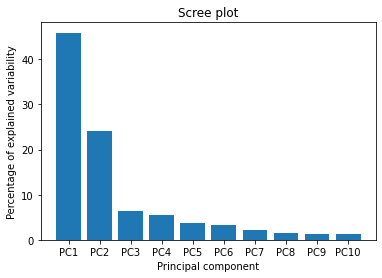

In [139]:
plt.bar(x=range(1, len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel('Percentage of explained variability')
plt.xlabel('Principal component')
plt.title('Scree plot')
plt.show()  # grande parte da variabilidade está presente nos primeiros 9 componentes (cut-off point de 2). Estes 9 PC podem fazer uma boa representaçao geral dos dados

* Soma das variancias dos PC

In [140]:
exp_var_cumul = np.cumsum(pca.explained_variance_ratio_)

px.area(
    x=range(1, exp_var_cumul.shape[0] + 1),
    y=exp_var_cumul,
    labels={"x": "# Components", "y": "Explained Variance"}
)

In [141]:

#Guardar as labels das amostras numa variavel unica de modo a colocar como indice na data frame dos PCs
sample_labels = final_df.index

pca_df = pd.DataFrame(pca_data, index=[sample_labels], columns=labels)
pca_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,0.451921,5.304976,-1.039199,-0.120236,-0.515004,-0.242163,-0.517175,-0.548159,0.163582,-0.097008
1,0.523109,4.560708,-0.193549,0.202746,1.040582,-0.526869,-0.235319,-0.045764,0.094378,0.058439
2,0.320621,5.115030,-1.001286,-0.105806,-0.613331,-0.343857,-0.240091,-0.083881,0.071559,-0.008888
3,0.523109,4.560708,-0.193549,0.202746,1.040582,-0.526869,-0.235319,-0.045764,0.094378,0.058439
4,0.320621,5.115030,-1.001286,-0.105806,-0.613331,-0.343857,-0.240091,-0.083881,0.071559,-0.008888
...,...,...,...,...,...,...,...,...,...,...
20105,-1.975821,-0.748403,-0.507629,-0.083867,-0.416924,-0.267672,0.150369,-0.353607,0.733852,-0.496555
20106,-1.960485,-1.821110,-0.309219,0.099560,0.145377,-0.830430,0.726421,1.217069,-1.028729,-0.863824
20107,-2.398216,-0.864817,0.002706,0.156255,0.506897,-0.352722,0.227552,0.065644,-0.328358,-0.038475
20108,-2.032599,-1.880602,-0.298277,0.103282,0.152099,-0.812041,0.775617,1.188123,-1.101290,-0.924695


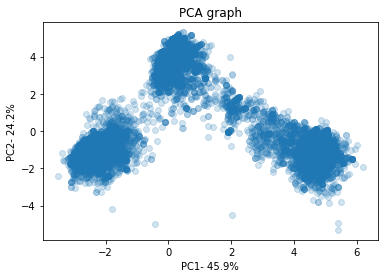

In [145]:


plt.scatter(pca_df.PC1, pca_df.PC2, alpha=0.2)
plt.title("PCA graph")
plt.xlabel('PC1- {0}%'.format(per_var[0]))
plt.ylabel('PC2- {0}%'.format(per_var[1]))
plt.show()

* KMeans clustering para identificar cluster (extrair os nossos clusters)


In [143]:
kmeans = KMeans(n_clusters=19, random_state=0) #como estamos a olhar para 2 PC, o n_clusters vai ser 2. O metodo 

#Compute cluster centers and predict cluster indices
X_clustered = kmeans.fit_predict(pca_df)


In [65]:
import seaborn as sns

# Criar labels unicas com as 19 clades

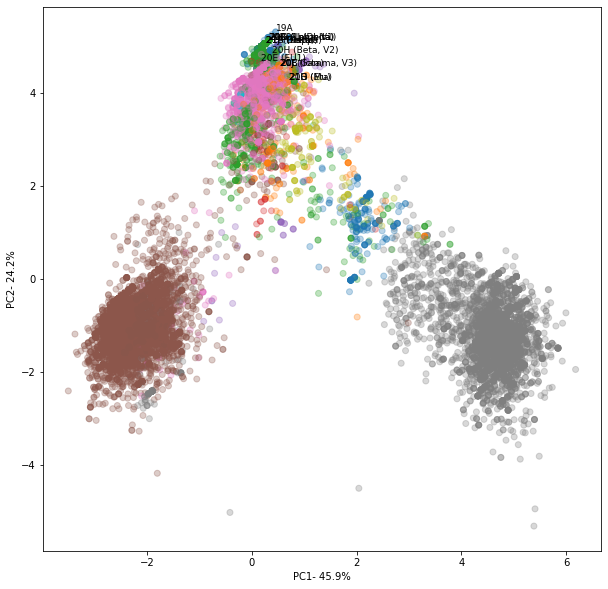

In [144]:
#color_map = {0 : 'blue', 1 : 'red',2:'black',3:'green'} #alterar consoante o numero de componentes a analisar
#dicionario vazio com clade 

dict_clade = {}
for index,clade in enumerate(final_df.iloc[:,1]):
	if not clade in dict_clade: dict_clade[clade] = 0

vect_palette = sns.color_palette(None, len(dict_clade))
for _, key in enumerate(dict_clade):
	dict_clade[key] = vect_palette[_]
label_color = []

for index,clade in enumerate(final_df.iloc[:,1]):
	label_color.append(dict_clade[clade])

plt.figure(figsize = (10,10))
plt.scatter(pca_df.PC1,pca_df.PC2, c= label_color, alpha=0.3)

#Add labels



for index,clade in enumerate(pd.unique(final_df.iloc[:,1])):

	i = range(1,len(final_df))

	labelpad = 0.01
	
	plt.text(pca_df.iloc[index,0]+labelpad, pca_df.iloc[index,1]+labelpad, clade, fontsize=9) # TODO: substituir cor por clade e nao por clusters
	#plt.scatter(pca_df.iloc[index,0], pca_df.iloc[index,1],c= label_color[index],edgecolor="",marker='*')

plt.xlabel('PC1- {0}%'.format(per_var[0]))
plt.ylabel('PC2- {0}%'.format(per_var[1]))
plt.show()

In [19]:
#